# ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ Îã§Ïö¥Î°úÎìú

In [16]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://repo.ai.gato/registry/repository/pypi-proxy/simple


# ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ import

In [105]:
from ultralytics import YOLO
import cv2
import yaml
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

- Îç∞Ïù¥ÌÑ∞ÏÖã ÌååÏùºÏùÄ ÏßÅÏ†ë Îã§Ïö¥Î°úÎìú ÌõÑ ÏïïÏ∂ïÏùÑ ÌíÄÍ≥† ÏóÖÎ°úÎìúÌï®

- Ï†ÑÏ≤òÎ¶¨ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•ÏùÑ ÏúÑÌï¥ dataset/train, dataset/val ÎîîÎ†âÌÜ†Î¶¨Î•º ÎßåÎì§Ïñ¥Ï£ºÏóàÎã§.

- .jpgÍ∞Ä ÏûàÎäî Ï§ÑÏùÑ ÌÜµÌï¥ Ïù¥ÎØ∏ÏßÄÌååÏùºÍ≥º ÎåÄÏùëÏãúÌÇ¥

- Í∑∏ ÏïÑÎû´Ï§ÑÏùÄ ÏñºÍµ¥ Í∞ØÏàò, Í∑∏ ÏïÑÎû´Íµ¥ÏùÄ ÏñºÍµ¥ Í∞ØÏàò ÎßåÌÅºÏùò bboxÏ†ïÎ≥¥Ïù¥Îã§.

- ÏôºÏ™Ω ÏúÑ Ï†êÍ≥º ÎÑàÎπÑ, ÎÜíÏù¥Ïùò Ï¢åÌëúÍ∞íÏùÑ YOLOÌòïÏãùÏóê ÎßûÍ≤å Í∞ÄÏö¥Îç∞ Ï†ê, ÎÑàÎπÑ, ÎÜíÏù¥Ïùò ÏÉÅÎåÄÏ¢åÌëúÎ°ú Î≥ÄÌôòÌïòÏó¨ Î¶¨Ïä§Ìä∏Ïóê ÎÑ£Ïùå

- Ïù¥ÌõÑ Ïù¥ÎØ∏ÏßÄÌååÏùºÏùÄ data_idx.imgÌååÏùºÎ°ú, Î¶¨Ïä§Ìä∏Îäî data_idx.txtÌååÏùºÎ°ú ÎßåÎì§Ïñ¥ data_dirÏóê ÎÑ£Ïùå

In [74]:
def mkdata(img_dir, label_path, data_dir):
    with open(label_path, "r") as f: # labelÌååÏùºÏùÑ Ïó¥Îü¨ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
        lines = f.readlines()
    
    image_count = 0 # ÌååÏùº Ï†ÄÏû•ÏùÑ ÏúÑÌïú Ïù¥ÎØ∏ÏßÄ Í∞úÏàò Ï†ÄÏû•
    
    for i in lines: # Ìïú Ï§ÑÏî© ÌôïÏù∏
        if ".jpg" in i: # .jpgÌååÏùºÏùÑ ÌÜµÌï¥ imgÍ≤ΩÎ°ú ÏßÅÏ†ë ÏÑ§Ï†ï
            img_path = i.split("\n")[0]
            img = cv2.imread(img_dir + img_path) # Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú ÏÑ§Ï†ï ÌõÑ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
            
            if img is None: # Ïù¥ÎØ∏ÏßÄÍ∞Ä Î∂àÎü¨ÏßÄÏßÄ ÏïäÏùÑ Í≤ΩÏö∞ Ïä§ÌÇµ
                continue
                
            # bbox indexÏÑ§Ï†ï
            num_obj = lines[lines.index(i) + 1].split("\n")[0]
            bbox_start = lines.index(i) + 2
            bbox_end = bbox_start + int(num_obj)
    
            #bbox ÌååÏùº ÎßåÎì§Í∏∞
            rel_bbox_list = []
            for j in range(bbox_start, bbox_end):
                bbox_list = lines[j].split("\n")[0]
                bbox_split = bbox_list.split(" ")

                # Ï†ÑÏ≤òÎ¶¨ Ïù¥Ï†Ñ bbox Îç∞Ïù¥ÌÑ∞
                x1 = int(bbox_split[0]) # bbox ÏôºÏ™Ω ÏúÑ Ï†êÏùò xÏ¢åÌëú
                y1 = int(bbox_split[1]) # bbox ÏôºÏ™Ω ÏúÑ Ï†êÏùò yÏ¢åÌëú
                w = int(bbox_split[2]) # bboxÏùò width
                h = int(bbox_split[3]) # bboxÏùò height
    
                # YOLOÎç∞Ïù¥ÌÑ∞ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω
                img_height = img.shape[0] # Ïù¥ÎØ∏ÏßÄ height
                img_width = img.shape[1] # Ïù¥ÎØ∏ÏßÄ width
                rel_x = str(float((x1 + int(w/2)) / img_width)) # bbox Ï§ëÏïô Ï†êÏùò xÏ¢åÌëúÎ•º Ïù¥ÎØ∏ÏßÄ widthÎ°ú ÎÇòÎàà ÏÉÅÎåÄÏ¢åÌëú
                rel_y = str(float((y1 + int(h/2)) / img_height)) # bbox Ï§ëÏïô Ï†êÏùò yÏ¢åÌëúÎ•º Ïù¥ÎØ∏ÏßÄ heightÎ°ú ÎÇòÎàà ÏÉÅÎåÄÏ¢åÌëú
                rel_w = str(float(w / img_width)) # bboxÏùò widthÎ•º Ïù¥ÎØ∏ÏßÄ widthÎ°ú ÎÇòÎàà ÏÉÅÎåÄÍ∏∏Ïù¥
                rel_h = str(float(h / img_height)) # bboxÏùò heightÎ•º Ïù¥ÎØ∏ÏßÄ heightÎ°ú ÎÇòÎàà ÏÉÅÎåÄÍ∏∏Ïù¥
                
                string_bbox = "0 " + rel_x + " " + rel_y + " " + rel_w + " " + rel_h # YOLOÎç∞Ïù¥ÌÑ∞ÌòïÏãùÏúºÎ°ú ÎßåÎì¨
                rel_bbox_list.append(string_bbox) # Îç∞Ïù¥ÌÑ∞ ÎÑ£Í∏∞
    
            # YOLO trainÏù¥ÎØ∏ÏßÄ, ÎùºÎ≤® Ï†ÄÏû•
            save_path = data_dir # Ï†ÄÏû•Í≤ΩÎ°ú ÏÑ§Ï†ï
            save_image_name = "data_" + str(image_count) # Ïù¥ÎØ∏ÏßÄ Ïù¥Î¶Ñ ÏÑ§Ï†ï
            
            cv2.imwrite( save_path + save_image_name + ".jpg", img) # Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
            
            with open(save_path + save_image_name + ".txt", "w") as f: # Ïù¥ÎØ∏ÏßÄ ÎùºÎ≤® Ï†ÄÏû•
                for i in rel_bbox_list:
                    f.write(i + "\n")
                    
            image_count += 1

In [71]:
train_img_dir_path = "WIDER_train/WIDER_train/images/"
train_label_path = "wider_face_split/wider_face_split/wider_face_train_bbx_gt.txt"
train_data_dir_path = "dataset/train/"

val_img_dir_path = "WIDER_val/WIDER_val/images/"
val_label_path = "wider_face_split/wider_face_split/wider_face_val_bbx_gt.txt"
val_data_dir_path = "dataset/val/"

In [ ]:
mkdata(train_img_dir_path, train_label_path, train_data_dir_path)

In [ ]:
mkdata(val_img_dir_path, val_label_path, val_data_dir_path)

# .yaml ÌååÏùº ÏÉùÏÑ±

- ultralyticsÏùò YOLOÎ™®Îç∏ÏùÄ .yamlÌååÏùºÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Ïù∏Ïãù

- ÌÅ¥ÎûòÏä§ ÌåêÎã® Î∞è ÎùºÎ≤®Í∞í, train, validation datasetÏùò Í≤ΩÎ°úÎ•º Ìè¨Ìï®Ìï®

In [75]:
data = {
    "train": "/home/20190891/dataset/train/", # train datasetÍ≤ΩÎ°ú
    "val": "/home/20190891/dataset/val/", # val datasetÍ≤ΩÎ°ú
    "nc": 1, # ÌÅ¥ÎûòÏä§ Í∞úÏàò
    "names": ["face"] # ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ
}

# .yaml ÌååÏùº Ï†ÄÏû•
with open("data.yaml", "w") as f:
    yaml.dump(data, f, default_flow_style=False)

# Î™®Îç∏ ÏÑ§Ï†ï

In [115]:
model = YOLO("yolo11n.pt") # pre-trainedÎêú yolo11 nanoÎ™®Îç∏ ÏÇ¨Ïö©

# ÌïôÏäµ Ïù¥Ï†Ñ Î™®Îç∏ ÏãúÍ∞ÅÌôî


image 1/1 /home/20190891/WIDER_test/WIDER_test/images/12--Group/12_Group_Group_12_Group_Group_12_27.jpg: 544x640 14 persons, 268.9ms
Speed: 64.1ms preprocess, 268.9ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)


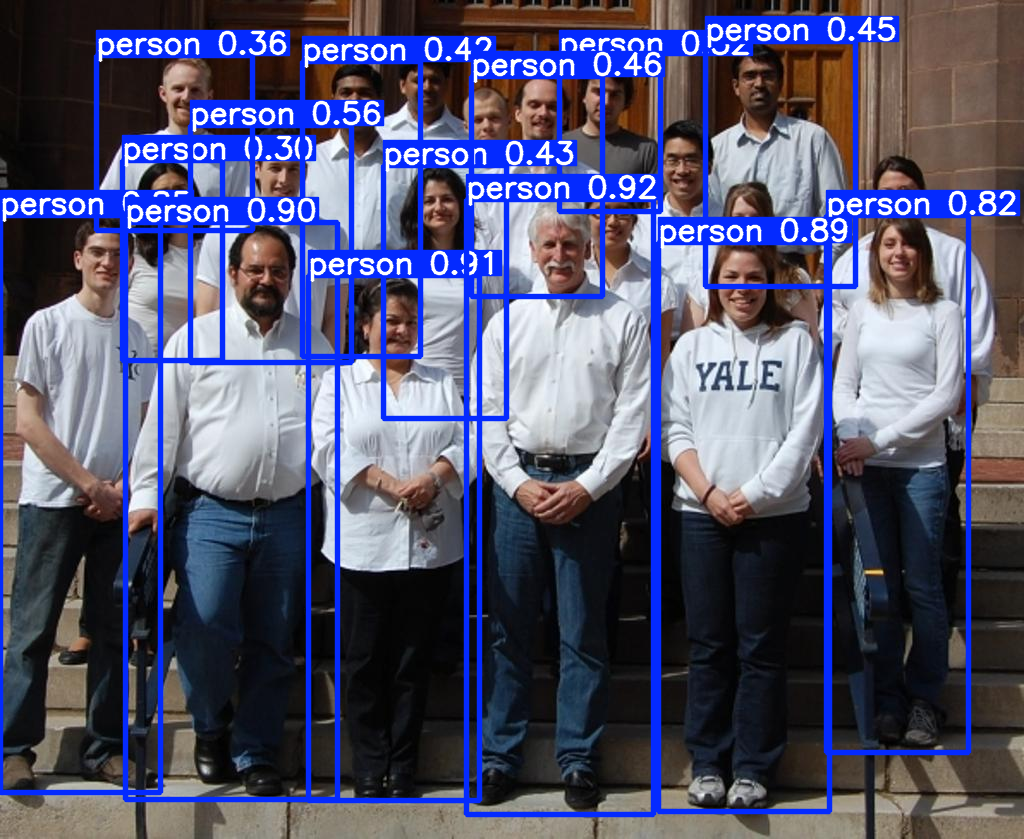

In [117]:
results = model("WIDER_test/WIDER_test/images/12--Group/12_Group_Group_12_Group_Group_12_27.jpg")
results[0].show()

# ÌïôÏäµ ÏßÑÌñâ

In [118]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

cuda:0


In [119]:
train_results = model.train(
    data="data.yaml",  # dataset Ïù∏ÏãùÌïòÎäî .yamlÌååÏùº Í≤ΩÎ°ú
    epochs=20,  # ÌïôÏäµ ÌöüÏàò
    imgsz=640,  # ÌïôÏäµÌïòÎäî Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à ÏÑ§Ï†ï
    device=device, # ÌïôÏäµ ÎîîÎ∞îÏù¥Ïä§ ÏÑ§Ï†ï
    workers=4, #
    project='runs/train', # ÌïôÏäµ Í≤∞Í≥º Ï†ÄÏû• Í≤ΩÎ°ú
    # name='exp',
    exist_ok=True,  # Ïù¥ÎØ∏ Ï°¥Ïû¨ÌïòÎäî ÎîîÎ†âÌÜ†Î¶¨ ÎçÆÏñ¥Ïì∞Í∏∞
    save=True # ÌïôÏäµÌïú Í∞ÄÏ§ëÏπòÎ•º Î™®Îç∏Î°úÏç® Ï†ÄÏû•
)

New https://pypi.org/project/ultralytics/8.3.81 available üòÉ Update with 'pip install -U ultralytics'
Ultralytics 8.3.78 üöÄ Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX A5000, 24241MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=4, project=runs/train, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

train: Scanning /home/20190891/dataset/train... 5260 images, 2 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5260/5260 [02:29<00:00, 35.19it/s]

train: WARNING ‚ö†Ô∏è /home/20190891/dataset/train/data_3231.jpg: 1 duplicate labels removed


train: New cache created: /home/20190891/dataset/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/20190891/dataset/val... 3226 images, 0 backgrounds, 1 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3226/3226 [01:26<00:00, 37.21it/s]

val: WARNING ‚ö†Ô∏è /home/20190891/dataset/val/data_1060.jpg: 1 duplicate labels removed
val: WARNING ‚ö†Ô∏è /home/20190891/dataset/val/data_1885.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.002]


val: New cache created: /home/20190891/dataset/val.cache
Plotting labels to runs/train/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/03/01 18:21:06 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/03/01 18:21:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/03/01 18:21:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


MLflow: logging run_id(762b35db4ab347dc98eed39c052c4bce) to http://127.0.0.1:5000
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ‚úÖ
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to runs/train/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20     0.658G       2.44      2.092      1.397        541        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [08:56<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [03:15<00:00,  1.94s/it]


                   all       3225      39675      0.618      0.326       0.36      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      11.4G      1.957      1.287        1.1        357        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [04:56<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:14<00:00,  1.36it/s]


                   all       3225      39675       0.71      0.397      0.456      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      10.3G      1.871      1.169      1.068        394        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [04:21<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:12<00:00,  1.39it/s]


                   all       3225      39675      0.726      0.426      0.481      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      10.8G       1.82      1.093      1.052        392        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [04:16<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:13<00:00,  1.37it/s]


                   all       3225      39675      0.746      0.444      0.504      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      11.4G      1.759      1.034      1.039        490        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [05:21<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [02:24<00:00,  1.44s/it]


                   all       3225      39675      0.761      0.442      0.514      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      12.9G      1.745      1.009      1.034        184        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [03:49<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [08:28<00:00,  5.03s/it]


                   all       3225      39675       0.76      0.449      0.525      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20        13G      1.725     0.9918      1.026        448        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [09:06<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [03:55<00:00,  2.33s/it]


                   all       3225      39675      0.767      0.469      0.543      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      15.1G      1.701     0.9565      1.017        260        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [03:58<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:09<00:00,  1.45it/s]


                   all       3225      39675      0.773       0.47      0.538      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      13.5G      1.684     0.9419      1.013        488        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [03:39<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:09<00:00,  1.45it/s]


                   all       3225      39675       0.77      0.477      0.543       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      10.3G      1.673     0.9268      1.011        304        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [03:40<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:09<00:00,  1.46it/s]


                   all       3225      39675       0.78      0.483      0.553      0.279
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      13.9G      1.623     0.9036      1.008        272        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [03:32<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:09<00:00,  1.45it/s]


                   all       3225      39675      0.776      0.489      0.561      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      8.77G      1.605     0.8695      1.005        170        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [03:30<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:09<00:00,  1.45it/s]


                   all       3225      39675       0.78      0.494      0.567      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      14.8G      1.606     0.8631      1.003        218        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [03:28<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:09<00:00,  1.46it/s]


                   all       3225      39675      0.789      0.493      0.568      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      12.5G       1.59     0.8397     0.9977        129        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [03:44<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:09<00:00,  1.46it/s]


                   all       3225      39675      0.791      0.505      0.575      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      11.2G      1.577     0.8289     0.9968         79        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [03:19<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:10<00:00,  1.44it/s]


                   all       3225      39675       0.79      0.499      0.573      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      13.4G      1.555     0.8138     0.9911         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [03:29<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:09<00:00,  1.46it/s]


                   all       3225      39675      0.797      0.509      0.583      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      18.5G      1.541      0.796     0.9856        123        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [03:29<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:07<00:00,  1.49it/s]


                   all       3225      39675      0.791      0.515      0.586      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      11.3G      1.547      0.799     0.9839        338        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [03:30<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:09<00:00,  1.46it/s]


                   all       3225      39675      0.794      0.512      0.586      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      9.06G      1.533     0.7863     0.9774        160        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [03:34<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:17<00:00,  1.30it/s]


                   all       3225      39675      0.801      0.517      0.591      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      16.1G      1.526     0.7786     0.9752        173        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 329/329 [03:21<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:17<00:00,  1.31it/s]


                   all       3225      39675      0.802      0.519      0.592      0.312

20 epochs completed in 2.122 hours.
Optimizer stripped from runs/train/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/train/train/weights/best.pt, 5.4MB

Validating runs/train/train/weights/best.pt...
Ultralytics 8.3.78 üöÄ Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX A5000, 24241MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [01:14<00:00,  1.36it/s]


                   all       3225      39675      0.801      0.519      0.592      0.312
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/train/train
üèÉ View run train at: http://127.0.0.1:5000/#/experiments/304833543303463077/runs/762b35db4ab347dc98eed39c052c4bce
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/304833543303463077
MLflow: results logged to http://127.0.0.1:5000
MLflow: disable with 'yolo settings mlflow=False'


# ÌïôÏäµ Ïù¥ÌõÑ Î™®Îç∏ ÏãúÍ∞ÅÌôî


image 1/1 /home/20190891/WIDER_test/WIDER_test/images/12--Group/12_Group_Group_12_Group_Group_12_27.jpg: 544x640 20 faces, 193.5ms
Speed: 4.2ms preprocess, 193.5ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)


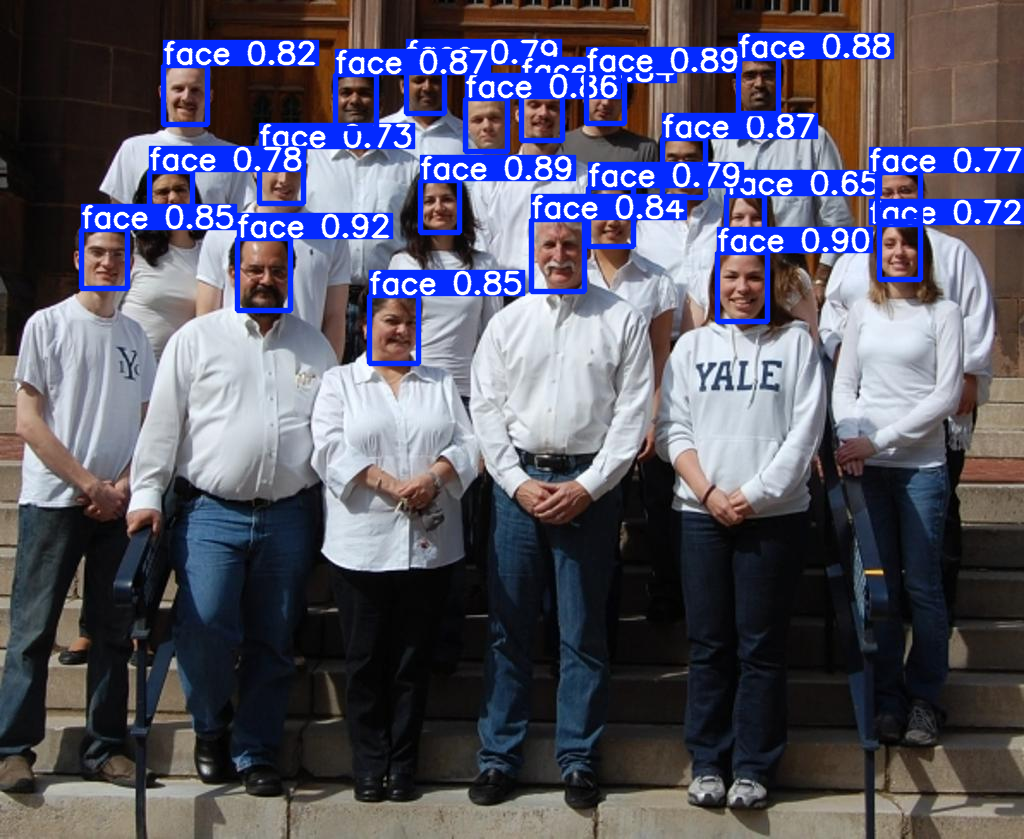

In [120]:
# ÌïôÏäµ Ïù¥Ï†Ñ Î™®Îç∏ÏóêÏÑú ÎûúÎç§ Ï∂îÏ∂úÌïú ÏÇ¨ÏßÑÏùÑ ÌïôÏäµÌïú Î™®Îç∏Î°ú Îã§Ïãú ÏãúÍ∞ÅÌôî
model_trained = YOLO("runs/train/exp/weights/best.pt")
results = model_trained("WIDER_test/WIDER_test/images/12--Group/12_Group_Group_12_Group_Group_12_27.jpg")
results[0].show()

# Î≥¥Í≥†ÏÑú

## 1. WIDER FACE Îç∞Ïù¥ÌÑ∞ÏÖã

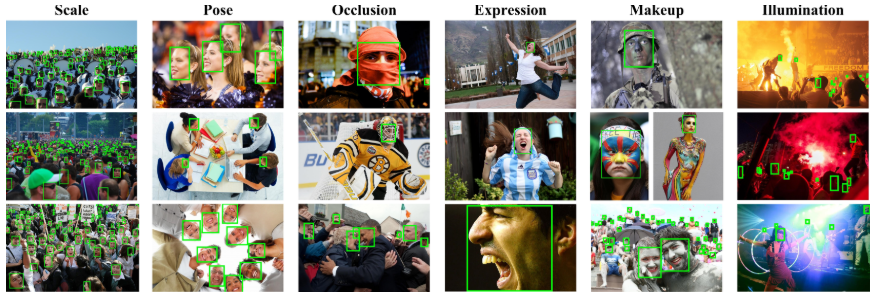

- ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ ÏúÑÌïú Î≤§ÏπòÎßàÌÅ¨ Îç∞Ïù¥ÌÑ∞ÏÖã
- 32203Í∞úÏùò Ïù¥ÎØ∏ÏßÄÏôÄ 393703Í∞úÏùò ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§Í∞Ä Ï°¥Ïû¨ÌïúÎã§.
- Îã§ÏñëÌïú ÌÅ¨Í∏∞, Ìè¨Ï¶à, Í∞ÄÎ†§Ïßê, Ï°∞Î™Ö, ÏÑ†Î™ÖÌï®, ÌëúÏ†ï Îì±Ïù¥ annotationÌååÏùºÏóê Ìè¨Ìï®ÌïúÎã§.
- Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
    - train : 40%
    - validation : 10%
    - test : 50% (bboxÍ∞Ä Í≥µÍ∞úÎêòÏßÄ ÏïäÏùå)
- ÌôúÏö© Î∂ÑÏïº
    - Object Detection : ÏùºÎ∞òÏ†ÅÏù∏ Í∞ùÏ≤¥ÌÉêÏßÄ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÎäî Îç∞Ïóê ÏÇ¨Ïö©Îê®
    - Face Detection : Í∞ÄÎ†§Ïßê, Ï°∞Î™Ö, ÏÑ†Î™ÖÎèÑ Îì± Îã§ÏñëÌïú ÌôòÍ≤ΩÏùò ÏÇ¨ÏßÑÎì§Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏñ¥ Í∞ïÍ±¥Ìïú ÏñºÍµ¥ Í≤ÄÏ∂ú Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÎäî Îç∞Ïóê ÏÇ¨Ïö©Îê®
    


## 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

### 2-1. ÌååÏùº Íµ¨Ï°∞ Ï∞®Ïù¥

- Í∏∞Ï°¥ WIDERFACEÎç∞Ïù¥ÌÑ∞ÏÖãÏùÄ images ÎîîÎ†âÌÜ†Î¶¨ ÏïàÏóê ÏÜåÏ£ºÏ†úÎ•º Ìè¨Ìï®ÌïòÎäî ÎîîÎ†âÌÜ†Î¶¨Í∞Ä Ï°¥Ïû¨ÌïòÍ≥† Í∑∏ ÏïàÏóê Ïù¥ÎØ∏ÏßÄÌååÏùºÏù¥ Ï°¥Ïû¨Ìï®
- ÎòêÌïú Î™®Îì† bboxÍ∞íÏùÑ Ìè¨Ìï®ÌïòÎäî txtÌååÏùº ÌïòÎÇòÎ°ú Ï°¥Ïû¨Ìï®

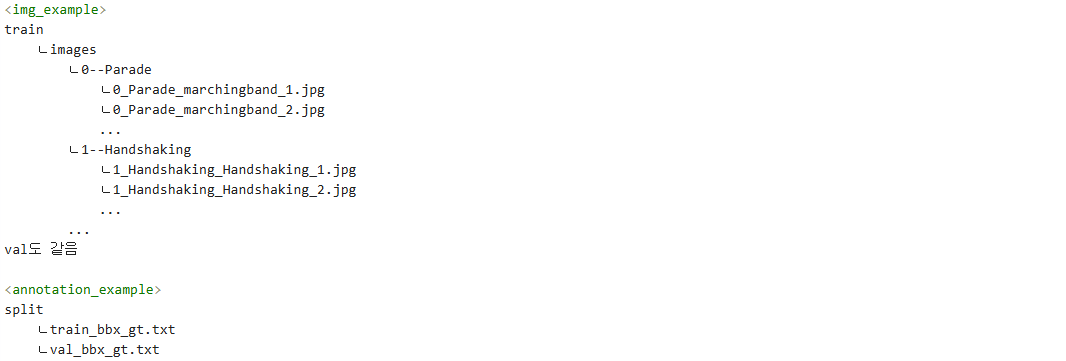

- ÌïòÏßÄÎßå YOLOÎ™®Îç∏Ïóê Îì§Ïñ¥Í∞ÄÎäî Îç∞Ïù¥ÌÑ∞ÏÖã ÏñëÏãùÏùÄ Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏïàÏóê images, labelsÎîîÎ†âÌÜ†Î¶¨Í∞Ä ÏûàÍ≥† Í∑∏ ÏïàÏóê Ïù¥ÎØ∏ÏßÄÏôÄ label.txtÌååÏùºÏù¥ Í∞ÅÍ∞Å ÏùºÎåÄÏùº ÎåÄÏùëÎêòÏñ¥ Ï†ÄÏû•ÎêòÏñ¥ÏûàÏùå
- ÎòêÌïú images, labelsÎ•º ÎÇòÎàÑÏßÄ ÏïäÍ≥†, Ìïú ÎîîÎ†âÌÜ†Î¶¨ ÎÇ¥Ïóê ÎÑ£Ïñ¥ÎèÑ ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥ Ïã§ÌóòÏùò Í≤ΩÏö∞Ïóî Ïù¥Îü¨Ìïú Î∞©ÏãùÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ ÎîîÎ†âÌÜ†Î¶¨Î•º ÏÑ§Ï†ïÌñàÏùå

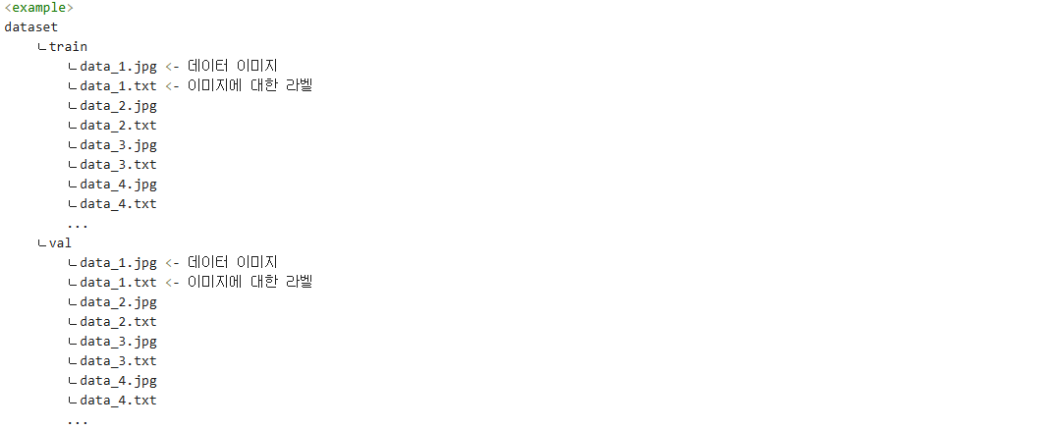


### 2-2. annotationÌååÏùº formatÏùò Ï∞®Ïù¥

- Í∏∞Ï°¥ WIDERFACEÏùò annotationÌååÏùºÏùÄ ÌååÏùº ÎîîÎ†âÌÜ†Î¶¨, ÏñºÍµ¥ Í∞úÏàò, ÏñºÍµ¥Ïùò bboxÏôÄ Îã§ÏñëÌïú Ï†ïÎ≥¥Î•º ÎÇòÏó¥Ìïú ÌòïÏãùÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏûàÏùå
- bboxÏùò ÌòïÏãùÏùÄ <x y ÎÑàÎπÑ ÎÜíÏù¥ (ÌùêÎ¶º, Í∞ÄÎ†§Ïßê Îì± Ï†ïÎ≥¥)>Ïù∏Îç∞ Ï§ëÏöîÌïú x, y, ÎÑàÎπÑ, ÎÜíÏù¥Í∞Ä ÌîΩÏÖÄÍ∞íÏúºÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ÏûàÎã§.
- ÎòêÌïú x, yÍ∞íÏùÄ bboxÏùò ÏôºÏ™Ω ÏúÑÏùò Íº≠ÏßÄÏ†êÏùò Ï¢åÌëúÏù¥Îã§.

<WIDERFACEÌòïÏãù annotaion>

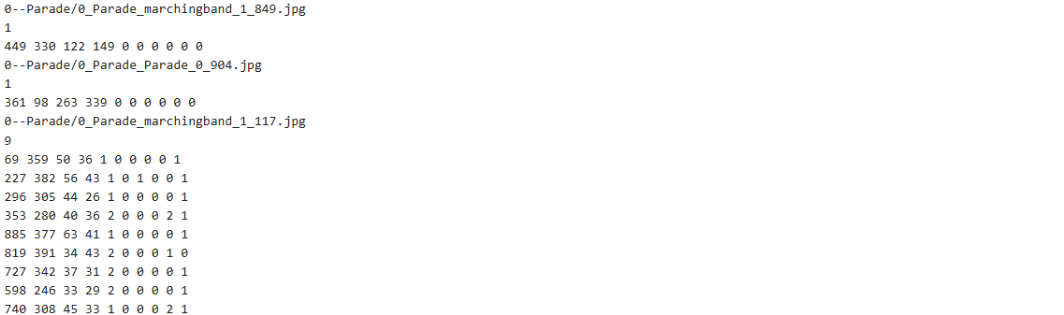

- Î∞òÎ©¥ YOLOÏùò bboxÏñëÏãùÏùÄ <ÌÅ¥ÎûòÏä§index x y ÎÑàÎπÑ ÎÜíÏù¥>Ïù¥Îã§.
- Ïö∞ÏÑ† Í≥ºÏ†úÏóêÏÑúÎäî ÏñºÍµ¥Îßå Í≤ÄÏ∂úÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, ÌÅ¥ÎûòÏä§indexÎäî 0ÏúºÎ°ú Í≥†Ï†ïÌïúÎã§.
- ÌïòÏßÄÎßå WIDERFACEÏôÄ Îã¨Î¶¨ x, y, ÎÑàÎπÑ, ÎÜíÏù¥Í∞Ä ÌîΩÏÖÄÍ∞íÏóêÏÑú Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤¥ ÎÑàÎπÑ, ÎÜíÏù¥Î°ú ÎÇòÎàà ÏÉÅÎåÄÌîΩÏÖÄÍ∞íÏúºÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ÏûàÎã§.
- ÎòêÌïú x, yÍ∞íÏùÄ bboxÏùò Ï§ëÏã¨Ï†êÏùò ÏÉÅÎåÄÌîΩÏÖÄÍ∞íÏúºÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ÏûàÎã§Îäî Ï†êÏù¥ Îã§Î•¥Îã§.

<YOLOÌòïÏãù annotation>

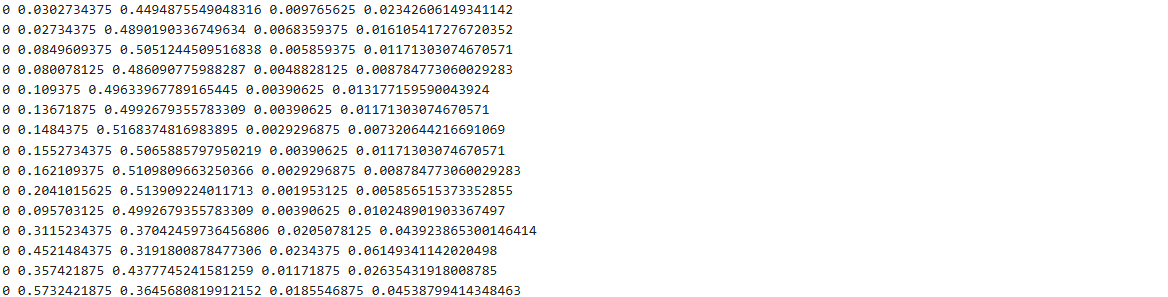



### 2-3. .yamlÌååÏùºÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïóê Îç∞Ïù¥ÌÑ∞ ÏûÖÎ†•

- ultralyticsÏùò YOLOÎ™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Îäî Ìï®Ïàò ÏïàÏóêÎäî ÌïôÏäµÏóê ÌïÑÏöîÌïú Ï†ïÎ≥¥Îì§Ïù¥ Îì§Ïñ¥Í∞ÄÏûàÎäî .yamlÌååÏùºÏùÑ ÎÑ£Ïñ¥Ï£ºÏñ¥Ïïº ÌïúÎã§.
- .yamlÌååÏùºÏóê Îì§Ïñ¥Í∞ÄÎäî ÏöîÏÜå
    - train : train datasetÍ≤ΩÎ°ú
    - val : val datasetÍ≤ΩÎ°ú
    - nc : ÌÅ¥ÎûòÏä§ Í∞úÏàò
    - names : ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ
- ÏßÅÏ†ë ÌååÏùºÏùÑ ÎßåÎì§Ïñ¥ ÎÑ£Ïñ¥Ï£ºÏóàÎã§.

<data.yaml>

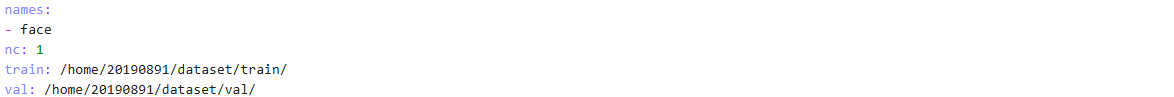

## 3. ÌïôÏäµÍ≤∞Í≥º Î∂ÑÏÑù Î∞è Í≥†Ï∞∞

- ÌïôÏäµÌïòÏßÄ ÏïäÏùÄ YOLOÎ™®Îç∏ÏùÄ ÏÇ¨Îûå, ÍπÉÎ∞ú Îì±Ïùò Í∞ùÏ≤¥ Ï†ÑÏ≤¥Î•º Ïù∏ÏãùÌïòÍ≥† ÏûàÏßÄÎßå, Îç∞Ïù¥ÌÑ∞ÏÖã ÌïôÏäµÏùÑ ÌÜµÌï¥ ÏñºÍµ¥ÎßåÏùÑ Ïù∏ÏãùÌïòÎäî Î™®Îç∏ÏùÑ ÎßåÎì§ÏóàÎã§. ÏòàÏãú ÏÇ¨ÏßÑÏùÑ ÌÜµÌï¥ ÏñºÍµ¥Îßå Ïûò Ïù∏ÏãùÌïòÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.

- precision, recall, mAP50, mAP50-95Ïùò Í∞íÏù¥ ÏßÄÏÜçÏ†ÅÏúºÎ°ú ÏÉÅÏäπÌïòÎã§ precision Ï†ïÌôïÎèÑ 80%Ïóê ÏàòÎ†¥ÌïòÎäî Î™®ÏäµÏùÑ Î≥¥Ïó¨Ï£ºÎ©∞ ÌïôÏäµÏù¥ Ïûò ÏßÑÌñâÎêòÎäî Î™®ÏäµÏùÑ Î≥¥Ïó¨Ï£ºÏóàÎã§.

- ÌïòÏßÄÎßå ÌïôÏäµ ÎèÑÏ§ë Ï†ïÌôïÎèÑÍ∞Ä 6%pÏ†ïÎèÑ Îñ®Ïñ¥ÏßÄÎäî Îì± ÏïàÏ†ïÏÑ± Ï∏°Î©¥ÏóêÏÑú Îñ®Ïñ¥ÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê learning rate, early stoppingÎì± Îã§ÏñëÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ ÌÜµÌï¥ ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÌïôÏäµÏù¥ ÏßÑÌñâÎêòÎèÑÎ°ù Ìï† ÌïÑÏöîÏÑ±Ïù¥ ÏûàÎã§.